<a href="https://colab.research.google.com/github/KaanErdogdu/Bootcamp_Bolum_1/blob/master/4_7_Odev.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")
baslik_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
eksen_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
ogrenciler = pd.read_csv("StudentsPerformance.csv")
ogrenciler.columns = ['cinsiyet', 'koken', 'aile_egt_seviyesi', 'ogle_yemegi', 
                              'hazirlik_kursu', 'matematik_notu', 'okuma_notu', 'yazma_notu']
ogrenciler.head()

,cinsiyet,koken,aile_egt_seviyesi,ogle_yemegi,hazirlik_kursu,matematik_notu,okuma_notu,yazma_notu
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.


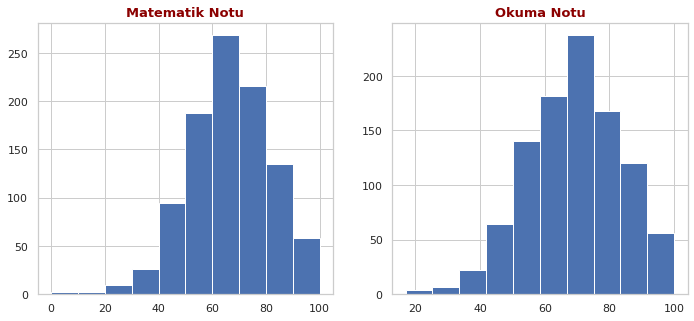

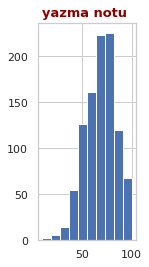

In [0]:
plt.figure(figsize = (18,5))

plt.subplot(1,3,1)
plt.hist(ogrenciler["matematik_notu"])
plt.title("Matematik Notu", fontdict=baslik_font)

plt.subplot(1,3,2)
plt.hist(ogrenciler["okuma_notu"])
plt.title("Okuma Notu", fontdict=baslik_font)
plt.show()

plt.subplot(1,3,3)
plt.hist(ogrenciler["yazma_notu"])
plt.title("yazma notu ", fontdict=baslik_font)
plt.show()

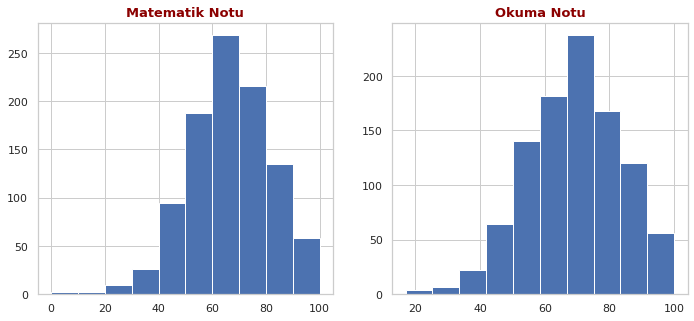

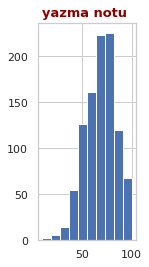

In [0]:
plt.figure(figsize = (18,5))

plt.subplot(1,3,1)
plt.hist(ogrenciler["matematik_notu"])
plt.title("Matematik Notu", fontdict=baslik_font)

plt.subplot(1,3,2)
plt.hist(ogrenciler["okuma_notu"])
plt.title("Okuma Notu", fontdict=baslik_font)
plt.show()

plt.subplot(1,3,3)
plt.hist(ogrenciler["yazma_notu"])
plt.title("yazma notu ", fontdict=baslik_font)
plt.show()

In [0]:
ogrenciler.describe()

,matematik_notu,okuma_notu,yazma_notu
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [0]:
ogrenciler["Ortalama"]= (ogrenciler["matematik_notu"]+ogrenciler["okuma_notu"]+ogrenciler["yazma_notu"])/3

In [0]:
ogrenciler["Ortalama"]

0      72.666667
1      82.333333
2      92.666667
3      49.333333
4      76.333333
         ...    
995    94.000000
996    57.333333
997    65.000000
998    74.333333
999    83.000000
Name: Ortalama, Length: 1000, dtype: float64

In [0]:
ogrenciler.head()

,cinsiyet,koken,aile_egt_seviyesi,ogle_yemegi,hazirlik_kursu,matematik_notu,okuma_notu,yazma_notu,Ortalama
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


Text(0.5, 1.0, 'Ortalama Notu')

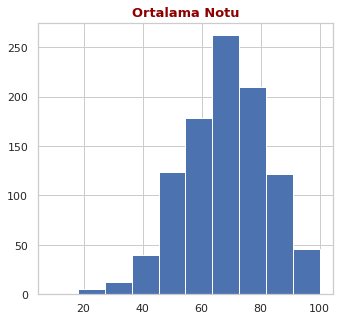

In [0]:
plt.figure(figsize = (18,5))

plt.subplot(1,3,1)
plt.hist(ogrenciler["Ortalama"])
plt.title("Ortalama Notu", fontdict=baslik_font)


Text(0.5, 1.0, 'Ortalama Notu')

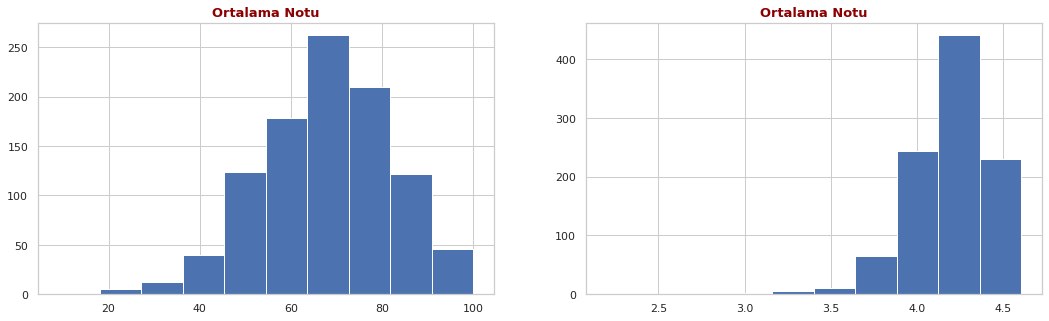

In [0]:
plt.figure(figsize = (18,5))

plt.subplot(1,2,1)
plt.hist(ogrenciler["Ortalama"])
plt.title("Ortalama Notu", fontdict=baslik_font)

plt.subplot(1,2,2)
plt.hist(np.log(ogrenciler["Ortalama"]))
plt.title("Ortalama Notu", fontdict=baslik_font)


In [0]:
medianlar = [np.median(ogrenciler["Ortalama"]), np.median(ogrenciler["matematik_notu"]),np.median(ogrenciler["okuma_notu"]),np.median(ogrenciler["yazma_notu"])]
medianlar

[68.33333333333333, 66.0, 70.0, 69.0]

In [0]:
ogrenciler["Ortalama"].describe()

count    1000.000000
mean       67.770667
std        14.257326
min         9.000000
25%        58.333333
50%        68.333333
75%        77.666667
max       100.000000
Name: Ortalama, dtype: float64

In [0]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

pd.options.display.float_format = '{:.5f}'.format

ozellikler = ["Ortalama", "matematik_notu", "okuma_notu", "yazma_notu"]
dagilim_testleri = pd.DataFrame(columns=['ozellik', 'jarque_bera_stats', 'jarque_bera_p_value', 
                                         'normal_stats', 'normal_p_value'])

for ozellik in ozellikler:
    jb_stats = jarque_bera(ogrenciler[ozellik])
    norm_stats = normaltest(ogrenciler[ozellik])
    dagilim_testleri = dagilim_testleri.append({"ozellik": ozellik,
                                                "jarque_bera_stats" : jb_stats[0] ,
                                                "jarque_bera_p_value" : jb_stats[1] ,
                                                "normal_stats": norm_stats[0] , 
                                                "normal_p_value" : norm_stats[1]
                                               }, ignore_index=True)
dagilim_testleri

,ozellik,jarque_bera_stats,jarque_bera_p_value,normal_stats,normal_p_value
0,Ortalama,15.45339,0.00044,15.18672,0.00050
1,matematik_notu,15.91226,0.00035,15.40896,0.00045
2,okuma_notu,11.38330,0.00337,11.11741,0.00385
3,yazma_notu,13.98509,0.00092,13.60645,0.00111


In [0]:
kadın_ort= ogrenciler[ogrenciler["cinsiyet"] == "female"]["Ortalama"].mean()
kadın_ort

erkek_ort = ogrenciler[ogrenciler["cinsiyet"] == "male"]["Ortalama"].mean()
erkek_ort

erkek_ort

65.83748271092671

In [0]:
plt.figure(figsize(12,5))

plt.subplot(1,1,1)
sns.barplot(ogrenciler["cinsiyet", ogrenciler["Ortalama"])
plt.title("Cinsiyete Göre Puanlar")

SyntaxError: ignored

Text(0.5, 1.0, 'Ortalama')

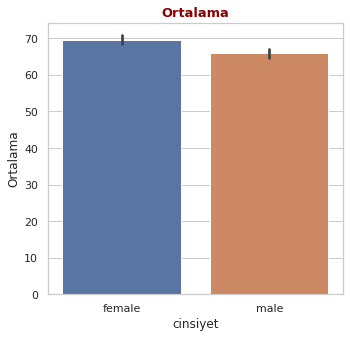

In [0]:
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.barplot(ogrenciler["cinsiyet"], ogrenciler ["Ortalama"])
plt.title("Ortalama", fontdict = baslik_font)


In [0]:
ogrenciler.groupby("cinsiyet").mean()


,matematik_notu,okuma_notu,yazma_notu,Ortalama
cinsiyet,,,,
female,63.63320,72.60811,72.46718,69.56950
male,68.72822,65.47303,63.31120,65.83748


Text(0.5, 1.0, 'Ortalama')

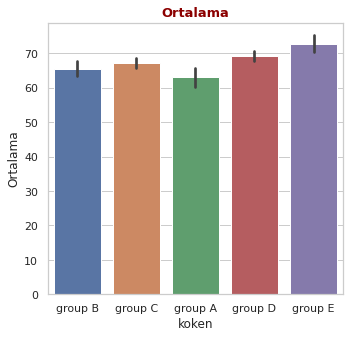

In [0]:
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.barplot(ogrenciler["koken"], ogrenciler ["Ortalama"])
plt.title("Ortalama", fontdict = baslik_font)


Text(0.5, 1.0, 'Ortalama')

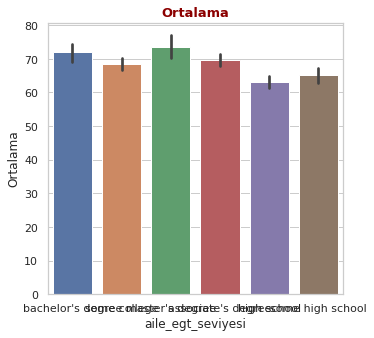

In [0]:
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.barplot(ogrenciler["aile_egt_seviyesi"], ogrenciler ["Ortalama"])
plt.title("Ortalama", fontdict = baslik_font)

Text(0.5, 1.0, 'Ortalama')

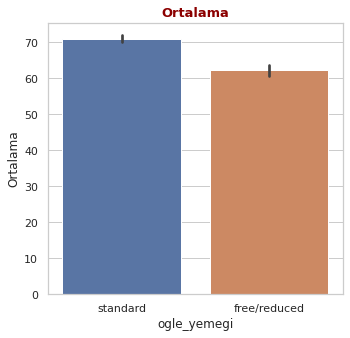

In [0]:
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.barplot(ogrenciler["ogle_yemegi"], ogrenciler ["Ortalama"])
plt.title("Ortalama", fontdict = baslik_font)

In [0]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

pd.options.display.float_format = '{:.5f}'.format

ozellikler = ["ogle_yemegi", "koken", "aile_egt_seviyesi"]
dagilim_testleri = pd.DataFrame(columns=['ozellik', 'jarque_bera_stats', 'jarque_bera_p_value', 
                                         'normal_stats', 'normal_p_value'])

for ozellik in ozellikler:
    jb_stats = jarque_bera(ogrenciler[ozellik])
    norm_stats = normaltest(ogrenciler[ozellik])
    dagilim_testleri = dagilim_testleri.append({"ozellik": ozellik,
                                                "jarque_bera_stats" : jb_stats[0] ,
                                                "jarque_bera_p_value" : jb_stats[1] ,
                                                "normal_stats": norm_stats[0] , 
                                                "normal_p_value" : norm_stats[1]
                                                }, ignore_index=True)
dagilim_testleri


TypeError: ignored

In [0]:
pd.get_dummies(ogrenciler["cinsiyet"]).head()
pd.get_dummies(ogrenciler["koken"]).head()
pd.get_dummies(ogrenciler["aile_egt_seviyesi"]).head()
pd.get_dummies(ogrenciler["ogle_yemegi"]).head()
pd.get_dummies(ogrenciler["hazirlik_kursu"]).head()


,completed,none
0,0,1
1,1,0
2,0,1
3,0,1
4,0,1


In [0]:
ogrenciler= pd.concat([ogrenciler, pd.get_dummies(ogrenciler["cinsiyet"])], axis=1)
ogrenciler= pd.concat([ogrenciler, pd.get_dummies(ogrenciler["koken"])], axis=1)
ogrenciler= pd.concat([ogrenciler, pd.get_dummies(ogrenciler["aile_egt_seviyesi"])], axis=1)
ogrenciler= pd.concat([ogrenciler, pd.get_dummies(ogrenciler["ogle_yemegi"])], axis=1)
ogrenciler= pd.concat([ogrenciler, pd.get_dummies(ogrenciler["hazirlik_kursu"])], axis=1)
ogrenciler.head()

,cinsiyet,koken,aile_egt_seviyesi,ogle_yemegi,hazirlik_kursu,matematik_notu,okuma_notu,yazma_notu,Ortalama,female,male,female,male,group A,group B,group C,group D,group E,female,male,group A,group B,group C,group D,group E,associate's degree,bachelor's degree,high school,master's degree,some college,some high school,free/reduced,standard,completed,none
0,female,group B,bachelor's degree,standard,none,72,72,74,72.66667,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1
1,female,group C,some college,standard,completed,69,90,88,82.33333,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0
2,female,group B,master's degree,standard,none,90,95,93,92.66667,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.33333,0,1,0,1,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1
4,male,group C,some college,standard,none,76,78,75,76.33333,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1


In [0]:
ogrenciler.columns

Index(['cinsiyet', 'koken', 'aile_egt_seviyesi', 'ogle_yemegi',
       'hazirlik_kursu', 'matematik_notu', 'okuma_notu', 'yazma_notu',
       'Ortalama', 'female', 'male', 'female', 'male', 'group A', 'group B',
       'group C', 'group D', 'group E', 'female', 'male', 'group A', 'group B',
       'group C', 'group D', 'group E', 'associate's degree',
       'bachelor's degree', 'high school', 'master's degree', 'some college',
       'some high school', 'free/reduced', 'standard', 'completed', 'none'],
      dtype='object')

In [0]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

pd.options.display.float_format = '{:.5f}'.format

ozellikler = ['female', 'male','group A','group B','group C', 'group D','free/reduced', 'standard', 'completed', 'none']
dagilim_testleri = pd.DataFrame(columns=['ozellik', 'jarque_bera_stats', 'jarque_bera_p_value', 
                                         'normal_stats', 'normal_p_value'])

for ozellik in ozellikler:
    jb_stats = jarque_bera(ogrenciler[ozellik])
    norm_stats = normaltest(ogrenciler[ozellik])
    dagilim_testleri = dagilim_testleri.append({"ozellik": ozellik,
                                                "jarque_bera_stats" : jb_stats[0] ,
                                                "jarque_bera_p_value" : jb_stats[1] ,
                                                "normal_stats": norm_stats[0] , 
                                                "normal_p_value" : norm_stats[1]
                                                }, ignore_index=True)
dagilim_testleri


,ozellik,jarque_bera_stats,jarque_bera_p_value,normal_stats,normal_p_value
0,female,500.00337,0.00000,"[3775.9602659150337, 3775.9602659150337, 3775....","[0.0, 0.0, 0.0]"
1,male,500.00337,0.00000,"[3775.9602659150337, 3775.9602659150337, 3775....","[0.0, 0.0, 0.0]"
2,group A,6120.81005,0.00000,"[584.7907379715066, 584.7907379715066]","[1.0334862797076577e-127, 1.0334862797076577e-..."
3,group B,853.21951,0.00000,"[234.9849721546788, 234.9849721546788]","[9.411560352085637e-52, 9.411560352085637e-52]"
4,group C,363.65670,0.00000,"[14834.62498199985, 14834.62498199985]","[0.0, 0.0]"
5,group D,447.76106,0.00000,"[228.37417056339333, 228.37417056339333]","[2.5655409883094337e-50, 2.5655409883094337e-50]"
6,free/reduced,172.28755,0.00000,5367.08722,0.00000
7,standard,172.28755,0.00000,5367.08722,0.00000
8,completed,171.79795,0.00000,5233.87137,0.00000
9,none,171.79795,0.00000,5233.87137,0.00000
